In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = np.random.normal(0,1,(71,3))
tmp = np.random.randint(0,2,(71,1))
Y = np.array([[int(tmp[i][0]==0), int(tmp[i][0]==1)] for i in range(len(tmp))])

X_test = np.random.normal(0,1,(20,3))
tmp = np.random.randint(0,2,(20,1))
Y_test = np.array([[int(tmp[i][0]==0), int(tmp[i][0]==1)] for i in range(len(tmp))])
_lambda = 0.1

In [0]:
def sigmoid(z):
  # sigmoid is a basic sigmoid function returning value from 0 to 1
  return 1/(1+np.exp(-z))

In [0]:
def sigmoid_grad(z):
  # sigmoid_grad is a gradient of sigmoid fucntion
  return sigmoid(z)*(1-sigmoid(z))

In [0]:
def initialize_theta(input_layer_size, output_layer_size, hidden_layer_size_list=[]):
  """
  initialize_theta creates structure of neural network
  
  Parameters:
    input_layer_size - int : number of input units - features
    output_layer_size - int : number of output units - labels
    hidden_layer_size_list - List of int : List of hidden layers size
  
  Returns:
    theta_L - list of np.array: List of theta values with each theta of random values from -1 to 1
  """
  if not hidden_layer_size_list:
    hidden_layer_size_list = [2]
    
  layer_size_list = [input_layer_size]
  layer_size_list.extend(hidden_layer_size_list)
  layer_size_list.append(output_layer_size)
  
  theta_L = [2*(np.random.rand(layer_size_list[i+1],layer_size_list[i]+1)-0.5) for i in range(len(layer_size_list)-1)]
  return theta_L

In [0]:
def add_bias_unit(X):
  """
  add_bias_unit is a function adding 1's to every row of matrix X
  
  Parameters:
    X - np.array : a matrix
    
  Returns:
    A new matrix X with bias unit
  """
  
  if X.ndim == 1:
    X.resize(1,X.shape[0])
  return np.append(np.ones((X.shape[0],1)),X,1)

In [0]:
def nn_cost_function(X,Y,theta_L,_lambda):
  """
  nn_cost_function is a function calculating cost function J_theta
  
  Parameters:
    X - np.array : input data without bias unit - n_observations by n_features
    Y - np.array : target data - n_observations by n_labels
    theta_L - List of np.array : List of theta's
    
  Returns:
    J_theta, a_N
  """
  if X.ndim == 1:
    X.resize(1,X.shape[0])
  if Y.ndim == 1:
    Y.resize(1,Y.shape[0])
  
  n_observations = len(X)
  n_theta = len(theta_L)
  
  a_N = [] # List of Activations with bias units for non-output layer
  a_N.append(X)
  
  # Loop for each theta in theta_L
  for i,theta in enumerate(theta_L):
    # Add bias unit
    a_N[i] = add_bias_unit(a_N[i])
    
    # Calculate z and a_N
    z = a_N[i].dot(theta.T)
    a_N.append(sigmoid(z))
    
  h_theta = a_N[-1] # hypothesis function
  
  # Calculate regularization - ignore the bias unit 
  regularizer = (_lambda/(2*n_observations)) * sum([(theta[:,1:]**2).sum() for theta in theta_L])
  
  # Calculate J_theta
  J_theta = (1/n_observations) * (-Y*np.log(h_theta) - (1-Y)*np.log(1-h_theta)).sum() + regularizer
  return J_theta, a_N

In [0]:
def back_prop(a_N, Y, theta_L, _lambda):
  """
  back_prop is Back-propagation that is used to compute Gradient of cost function
  
  Parameters:
    a_N - List of np.array : List of Activations with bias units for non-output layer
    Y - np.array : target data - n_observations by n_labels
    theta_L - List of np.array : List of theta's
    _lambda - float : the value of lambda
    
  Returns:
    theta_grad_L - List of np.array : List of Theta Gradients
  """
  if Y.ndim == 1:
    Y.resize(1,Y.shape[0])
  
  n_theta = len(theta_L)
  n_observations = len(Y)
  
  # Get error for output layer
  y_pred = a_N[-1]
  delta_N = []
  delta = y_pred - Y
  if delta.ndim == 1:
    delta.resize(1,delta.shape[0])
  delta_N.append(delta)
  
  # Get error for hidden layers - stop before layer 0 - no error at input layer
  for i in range(n_theta-1,0,-1):
    delta = delta.dot(theta_L[i][:,1:]) * sigmoid_grad(a_N[i][:,1:])
    delta_N.append(delta)
  delta_N.reverse()
  
  # Compute Gradient from delta and activation
  theta_grad_L = []
  for i in range(n_theta):
    theta_grad_L.append(delta_N[i].T.dot(a_N[i]))
    
  # Create theta regularization
  regTheta_L = [np.zeros_like(theta) for theta in theta_L]
  for i in range(n_theta):
    regTheta_L[i][:,1:] = theta_L[i][:,1:]
  
  # Average error + theta regularization
  for i in range(n_theta):
    theta_grad_L[i] = (1/n_observations) * theta_grad_L[i] + _lambda * regTheta_L[i]
    
  return theta_grad_L

In [0]:
def predict(X_test, theta_L):
  """
  predict is a function used for compute the outcome from model theta_L
  
  Parameters:
    X_test - np.array : testing input data
    theta_L - list of np.array : model after training
    
  Returns:
    predicted outcomes
  """
  if X_test.ndim == 1:
    X_test.resize(1,X.shape[0])
  
  n_observations = len(X)
  n_theta = len(theta_L)
  
  a_N = [] # List of Activations with bias units for non-output layer
  a_N.append(X_test)
  
  # Loop for each theta in theta_L
  for i,theta in enumerate(theta_L):
    # Add bias unit
    a_N[i] = add_bias_unit(a_N[i])
    
    # Calculate z and a_N
    z = a_N[i].dot(theta.T)
    a_N.append(sigmoid(z))
  return a_N[-1]

In [0]:
def accuracy(X_test, Y_test, theta_L):
  """
  accuracy is a function computing the accuracy of the model on testing data
  
  Parameters:
    X_test - np.array : testing input data
    Y_test - np.array : testing target data
    theta_L - List of np.array : List of theta's - model
  
  Returns:
    Accuracy of the model
  """
  y_pred = predict(X_test, theta_L)
  # Get label
  Y_ = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
  Ytest = [np.argmax(Y_test[i]) for i in range(len(Y_test))]
  # Test
  s = [a==b for a,b in zip(Y_,Ytest)]
  return sum(s)/len(Y_test)

In [0]:
def fit(X,Y,X_test,Y_test, hidden_layer_size_list=[], batch=1, epochs=3, learning_rate=0.1, momentum_rate=0.1, lmbda=0.1):
  """
  fit is a function that executes training data on neural network
  
  Parameters:
    X, X_test - np.array : input data without bias unit - n_observations by n_features
    Y, Y_test - np.array : target data - n_observations by n_labels
    hidden_layer_size_list - List of int : List of hidden layers size
    batch - int : number of data points that are push in at a time
    epochs - int : number of loops
    learning_rate - float : the learning rate - alpha
    momentum_rate - float : the momentum rate - mu
    lmbda - float : lambda
  
  Returns:
    Print the learning process
    Theta_L : the models
  """
  
  # Initialize
  if X.ndim == 1:
    X.resize(1,X.shape[0])
  if Y.ndim == 1:
    Y.resize(1,Y.shape[0])
  input_layer_size = X.shape[1]
  output_layer_size = Y.shape[1]
  if not hidden_layer_size_list:
    hidden_layer_size_list = [2]
  n_observations = len(X)
  n_theta = len(hidden_layer_size_list)
  n_batches = np.round(n_observations/batch)

  # Check exceptions
  if batch > n_observations:
    raise ValueError('batch cannot be greater than number of observations')
    
  # Initialize theta
  theta_L = initialize_theta(input_layer_size, output_layer_size,hidden_layer_size_list)
  
  # Initialize Weight change terms
  weight_change_L = [np.zeros_like(theta) for theta in theta_L]
  
  # List of results cost and accuracy
  J_list = [0] * epochs
  accuracy_list = [0] * epochs
  
  # The best neural network model
  best_accuracy = 0
  model = []
  
  print('Training...')
  # Loop for each epochs
  for i in range(epochs):
    # Split dataset into batches
    X_batches = np.array_split(X,n_batches)
    Y_batches = np.array_split(Y,n_batches)
    
    # Training
    for x,y in zip(X_batches, Y_batches):
      # Compute cost
      J_list[i], a_N = nn_cost_function(x,y,theta_L,lmbda)
      
      # Back-propagation to get theta gradient
      theta_grad_L = back_prop(a_N,y,theta_L,lmbda)
      
      # Update theta with momentum
      for j,theta_g in enumerate(theta_grad_L):
        weight_change_L[j] = learning_rate*theta_g + momentum_rate * weight_change_L[j]
        theta_L[j] = theta_L[j] - weight_change_L[j]
    # Compute accuracy
    accuracy_list[i] = np.round(accuracy(X_test, Y_test, theta_L),5)
    
    # Get the best model
    if accuracy_list[i] > best_accuracy:
      best_accuracy = accuracy_list[i]
      model = theta_L[i]
    
    print(i+1,'/',epochs,': cost=',J_list[i],' and accuracy=',accuracy_list[i], sep='')
  
  return model, J_list, accuracy_list

Training...
1/30: cost=1.4915987872374619 and accuracy=0.55
2/30: cost=1.4528409703822398 and accuracy=0.55
3/30: cost=1.4343246400639313 and accuracy=0.55
4/30: cost=1.423900592672485 and accuracy=0.55
5/30: cost=1.4170625137099808 and accuracy=0.55
6/30: cost=1.412062820135559 and accuracy=0.55
7/30: cost=1.4081595881419726 and accuracy=0.55
8/30: cost=1.4049965224139047 and accuracy=0.55
9/30: cost=1.4023776755106525 and accuracy=0.55
10/30: cost=1.4001811254681837 and accuracy=0.55
11/30: cost=1.3983233468309386 and accuracy=0.55
12/30: cost=1.3967431006128113 and accuracy=0.55
13/30: cost=1.3953933815684965 and accuracy=0.55
14/30: cost=1.394236975538386 and accuracy=0.55
15/30: cost=1.3932437834778264 and accuracy=0.55
16/30: cost=1.3923890882911936 and accuracy=0.55
17/30: cost=1.3916523657836082 and accuracy=0.55
18/30: cost=1.3910164312883841 and accuracy=0.55
19/30: cost=1.3904668050916928 and accuracy=0.55
20/30: cost=1.3899912270540449 and accuracy=0.55
21/30: cost=1.389579

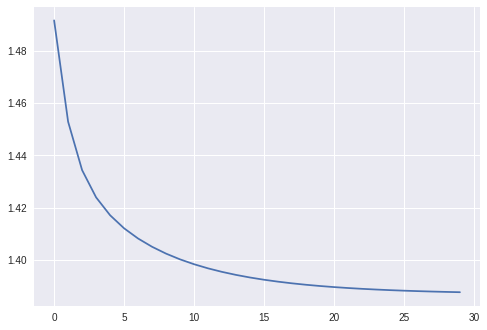

In [11]:
model, J_list, accuracy_list = fit(X,Y,X_test,Y_test, hidden_layer_size_list=[3,4], batch=10, epochs=30, learning_rate=0.1, momentum_rate=0.1, lmbda=0.1)
# Plot cost function graph
plt.plot(J_list)
plt.show()

Training...
1/30: cost=1.762253694247422 and accuracy=0.33333
2/30: cost=1.763232385402058 and accuracy=0.66667
3/30: cost=1.580748983983429 and accuracy=0.93333
4/30: cost=1.3737975916617462 and accuracy=0.96667
5/30: cost=1.3050106028978106 and accuracy=0.93333
6/30: cost=1.2473593689420468 and accuracy=0.9
7/30: cost=1.1631599190301316 and accuracy=1.0
8/30: cost=1.0868266155518422 and accuracy=1.0
9/30: cost=1.046980878428937 and accuracy=1.0
10/30: cost=1.0306802490596734 and accuracy=1.0
11/30: cost=0.994223050047808 and accuracy=0.93333
12/30: cost=0.9517738108714779 and accuracy=1.0
13/30: cost=0.9132996820574932 and accuracy=0.96667
14/30: cost=0.875061647833715 and accuracy=0.96667
15/30: cost=0.8571686844231792 and accuracy=0.93333
16/30: cost=0.8443696065315175 and accuracy=0.93333
17/30: cost=0.8448934001715355 and accuracy=0.93333
18/30: cost=0.8422080538774587 and accuracy=0.93333
19/30: cost=0.843393068203561 and accuracy=0.93333
20/30: cost=0.82439918247708 and accurac

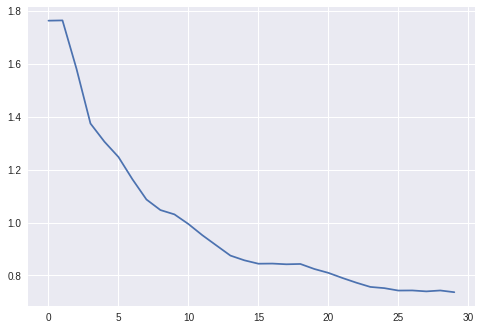

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target
target.resize(target.shape[0],1)
dataset = np.append(target,data,axis=1)
np.random.shuffle(dataset)
Y = dataset[:,0]
X = dataset[:,1:]
tmp = np.zeros((len(Y),3))
tmp[np.arange(len(Y)),Y.astype(int)] = 1
Y = tmp

X_train = X[:120,:]
X_test = X[120:,:]
Y_train = Y[:120,:]
Y_test = Y[120:,:]
model, J_list, accuracy_list = fit(X_train,Y_train,X_test,Y_test, hidden_layer_size_list=[15], batch=30, epochs=30, learning_rate=0.1, momentum_rate=0.9, lmbda=1e-4)

# Plot cost function graph
plt.plot(J_list)
plt.show()

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
data = iris.data
target = iris.target
target.resize(target.shape[0],1)
dataset = np.append(target,data,axis=1)
np.random.shuffle(dataset)
Y = dataset[:,0]
X = dataset[:,1:]
X_train = X[:120,:]
X_test = X[120:,:]
Y_train = Y[:120]
Y_test = Y[120:]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

1.0


Training...
1/10: cost=1.4312553410637299 and accuracy=0.64497
2/10: cost=1.2893825297190937 and accuracy=0.40828
3/10: cost=1.3035934995236043 and accuracy=0.60355
4/10: cost=1.0492004224568254 and accuracy=0.89349
5/10: cost=1.507343730147307 and accuracy=0.80473
6/10: cost=1.418801437704951 and accuracy=0.40828
7/10: cost=1.320329205511185 and accuracy=0.40828
8/10: cost=1.2324193408147286 and accuracy=0.40828
9/10: cost=1.1942580785273407 and accuracy=0.86391
10/10: cost=1.4629773792617964 and accuracy=0.89349


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


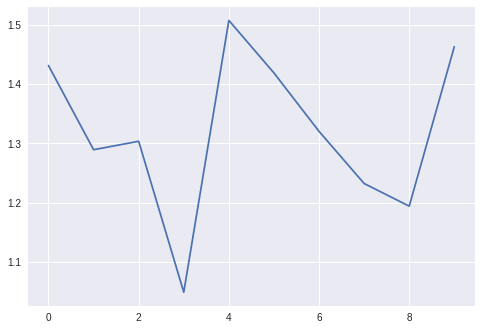

In [50]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target
target.resize(target.shape[0],1)
dataset = np.append(target,data,axis=1)
np.random.shuffle(dataset)
Y = dataset[:,0]
X = dataset[:,1:]
tmp = np.zeros((len(Y),2))
tmp[np.arange(len(Y)),Y.astype(int)] = 1
Y = tmp

X_train = X[:400,:]
X_test = X[400:,:]
Y_train = Y[:400,:]
Y_test = Y[400:,:]
model, J_list, accuracy_list = fit(X_train,Y_train,X_test,Y_test, hidden_layer_size_list=[15], batch=30, epochs=10, learning_rate=0.005, momentum_rate=0.3, lmbda=1e-4)

# Plot cost function graph
plt.plot(J_list)
plt.show()

In [49]:
breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target
target.resize(target.shape[0],1)
dataset = np.append(target,data,axis=1)
np.random.shuffle(dataset)
Y = dataset[:,0]
X = dataset[:,1:]

X_train = X[:400,:]
X_test = X[400:,:]
Y_train = Y[:400]
Y_test = Y[400:]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.9289940828402367
